In [6]:
# import random search, random forest, iris data, and distributions

%matplotlib notebook
from sklearn.model_selection import cross_validate
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

In [7]:
import pandas as pd
data = pd.read_csv('HaitiPixels_good_01.csv')  
data.head()

,Type,Red,Green,Blue
0,0,104,89,63
1,0,101,80,60
2,0,103,87,69
3,0,107,93,72
4,0,109,99,68


In [8]:
from sklearn import datasets
X=data[['Red', 'Green', 'Blue']]  # Features
y=data['Type']  # Labels
X.columns = ['Red','Green','Blue']
y.columns = ['Target']

https://www.kaggle.com/diegosch/classifier-evaluation-using-confusion-matrix

In [9]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print('Logistic regression classifier (default settings)\n', confusion)

C:\Users\gladi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic regression classifier (default settings)
 [[311777     56]
 [   205   2535]]


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, lr_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, lr_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, lr_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, lr_predicted)))

Accuracy: 0.98
Precision: 0.01
Recall: 0.01
F1: 0.01


C:\Users\gladi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<IPython.core.display.Javascript object>


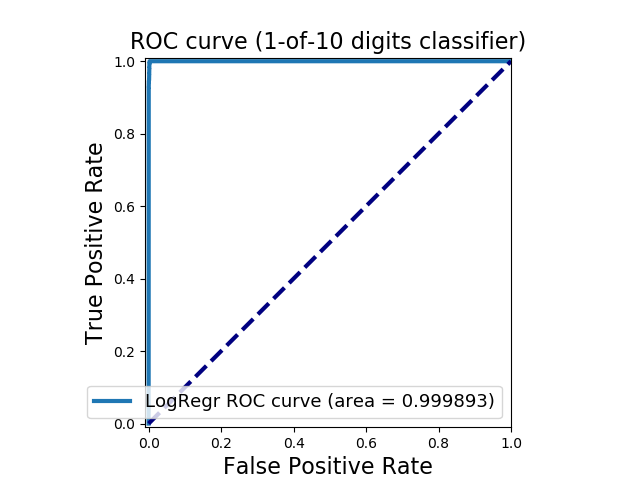

C:\Users\gladi\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


In [20]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.6f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

In [14]:
y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20,1]))

# show the probability of positive class for first 20 instances
y_proba_list

C:\Users\gladi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[(0, 4.699872485060623e-06),
 (0, 2.630144168528003e-10),
 (0, 0.00015212977270703964),
 (0, 7.861854744415084e-08),
 (0, 7.132403070253463e-07),
 (0, 3.777740918652345e-12),
 (0, 4.4169113855575285e-10),
 (0, 6.534024669243073e-09),
 (0, 9.767014047458011e-08),
 (0, 4.3898273667859605e-07),
 (0, 3.150667903488472e-08),
 (0, 2.7968889400576698e-06),
 (0, 1.3622246133601962e-10),
 (0, 3.1883266074862526e-08),
 (0, 1.1584283078941536e-08),
 (0, 1.2369275505389785e-09),
 (0, 9.585798814529356e-06),
 (0, 8.125498557794236e-09),
 (0, 7.697630883366682e-09),
 (0, 1.104076491355484e-06)]

In [16]:
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))

# show the decision_function scores for first 20 instances
y_score_list

C:\Users\gladi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[(0, -12.267970480570945),
 (0, -22.058812268059363),
 (0, -8.790624492215338),
 (0, -16.358658114157954),
 (0, -14.15344672357441),
 (0, -26.301894925519747),
 (0, -21.540410259218852),
 (0, -18.84624274172134),
 (0, -16.14166985156072),
 (0, -14.638805309856165),
 (0, -17.27306624923045),
 (0, -12.787000054448063),
 (0, -22.716731821312415),
 (0, -17.261184507365382),
 (0, -18.273616552954024),
 (0, -20.510635312697467),
 (0, -11.555218259028837),
 (0, -18.628258741528327),
 (0, -18.682353225216417),
 (0, -13.716500222784326)]

<IPython.core.display.Javascript object>


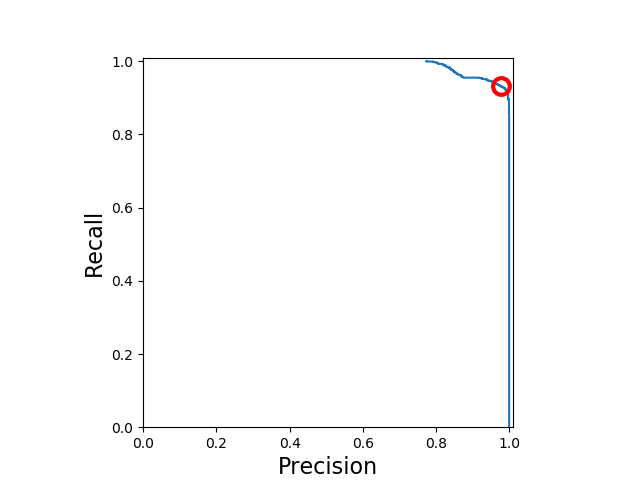

C:\Users\gladi\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


In [17]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

In [ ]:
from matplotlib import cm

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()